In [30]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [31]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [32]:
train_images = train_images / 255.0
test_images = test_images / 255.0

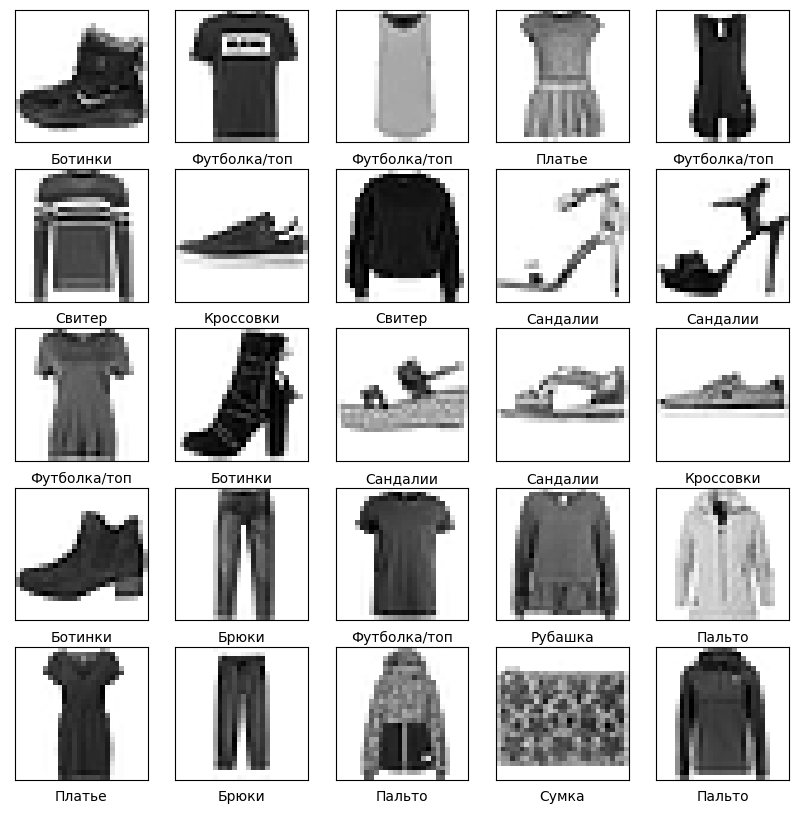

In [33]:
class_names = ["Футболка/топ", "Брюки", "Свитер", "Платье", "Пальто",
               "Сандалии", "Рубашка", "Кроссовки", "Сумка", "Ботинки"]

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [35]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5037 - accuracy: 0.8225
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3789 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3391 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3134 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2955 - accuracy: 0.8895
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2824 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2696 - accuracy: 0.8995
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2600 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2495 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

In [36]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3410 - accuracy: 0.8800 - 493ms/epoch - 2ms/step

Test accuracy: 0.8799999952316284


In [37]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [38]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [39]:
predictions[0]

array([5.5310676e-07, 1.4175089e-09, 1.2061258e-09, 4.1797654e-09,
       7.2677402e-09, 1.9842492e-04, 8.9962180e-07, 3.4231238e-02,
       1.6753050e-07, 9.6556872e-01], dtype=float32)

In [40]:
np.argmax(predictions[0])

9

In [41]:
test_labels[0]

9

In [42]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

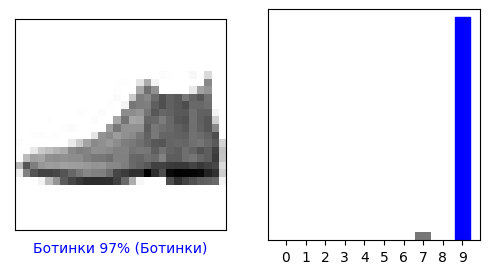

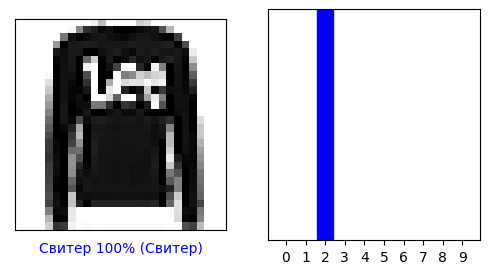

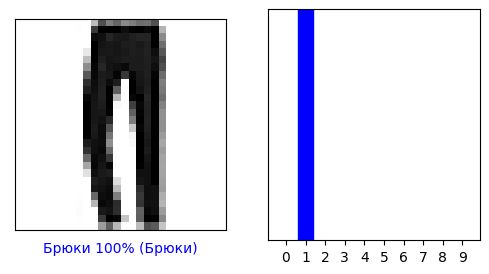

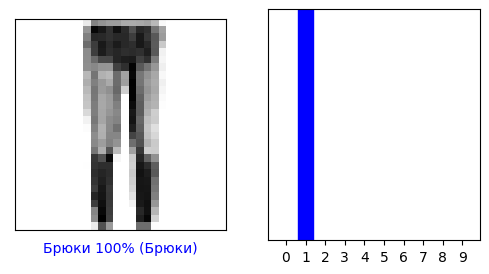

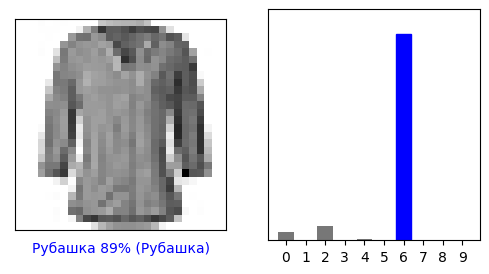

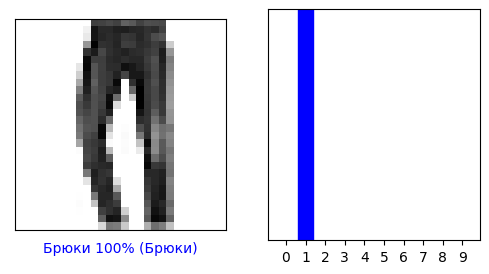

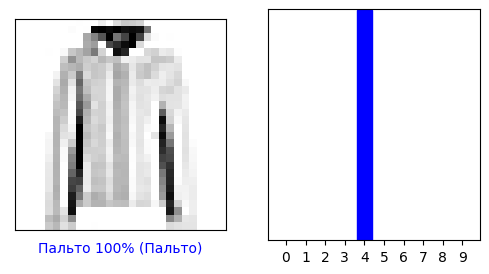

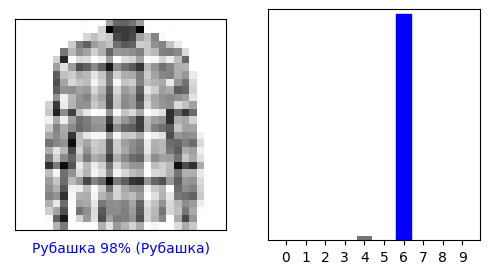

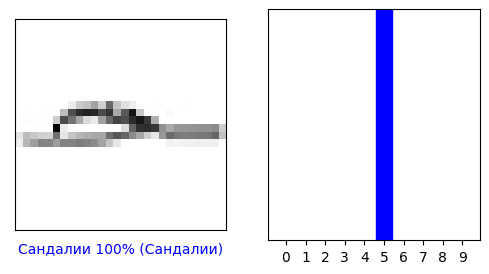

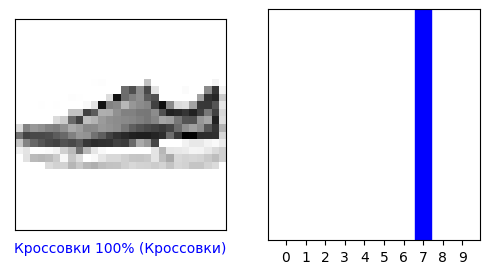

In [56]:
for i in range(10):
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(1, 2, 2)
    plot_value_array(i, predictions[i],  test_labels)
    plt.show()

In [ ]:
model.save("fashion_mnist")